## Zipped Data Review (Data Cleaning)

Below are the list of available zipped databases:
1. Box Office Mojo (bom.movie_gross.csv.gz)
2. IMDB (im.db.zip)
3. Rotten Tomatoes info (rt.movie_info.tsv.gz)
4. Rotten Tomatoes reviews (rt.reviews.tsv.gz)
5. The Movie Database (tmdb.movies.csv.gz)
6. The Numbers (tn.movie_budgets.csv.gz)


## 1. <u>Box Office Mojo</u>

In [1]:
# Iporting the required libraries
import pandas as pd

# Loading the bom movie gross dataset
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
print(df_bom.shape)
print(df_bom.columns)

(3387, 5)
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [2]:
# Review the columns number and types of the table
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [3]:
# Summary of the raw data
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## 2. <u>IMDB Data Review</u>

In [4]:
import zipfile
import sqlite3
import os

# Unzip the file
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData')

# Connect to the SQLite database
conn = sqlite3.connect('unzippedData/im.db')

# view the list of tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

print("Tables:", tables)



Tables:             name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [5]:
# Looping through each table name found above
for table_name in tables['name']:
    print("\n"f"--- Table: {table_name} ---")
    
    # 1. Get the number of rows (SELECT count(*))
    query_count = f"SELECT count(*) as count FROM {table_name}"
    df_count = pd.read_sql(query_count, conn)
    row_count = df_count.iloc[0]['count']
    print(f"Row Count: {row_count}")
    
    # 2. Get the column info (PRAGMA table_info matches the table schema)
    query_info = f"PRAGMA table_info({table_name})"
    df_info = pd.read_sql(query_info, conn)
    
    # Display just the column name and data type
    print("Columns:")
    print(df_info[['name', 'type']].to_string())
    print("\n" + "="*30 + "\n")


--- Table: movie_basics ---
Row Count: 146144
Columns:
              name     type
0         movie_id     TEXT
1    primary_title     TEXT
2   original_title     TEXT
3       start_year  INTEGER
4  runtime_minutes     REAL
5           genres     TEXT



--- Table: directors ---
Row Count: 291174
Columns:
        name  type
0   movie_id  TEXT
1  person_id  TEXT



--- Table: known_for ---
Row Count: 1638260
Columns:
        name  type
0  person_id  TEXT
1   movie_id  TEXT



--- Table: movie_akas ---
Row Count: 331703
Columns:
                name     type
0           movie_id     TEXT
1           ordering  INTEGER
2              title     TEXT
3             region     TEXT
4           language     TEXT
5              types     TEXT
6         attributes     TEXT
7  is_original_title     REAL



--- Table: movie_ratings ---
Row Count: 73856
Columns:
            name     type
0       movie_id     TEXT
1  averagerating     REAL
2       numvotes  INTEGER



--- Table: persons ---
Row Count

In [6]:
# Read columns within the Table: 'Movie_Basics' to check the structure
df_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

# View columns and types
print(df_basics.info())

# View raw data
df_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
# Read columns within the Table: 'Directors' to check the structure
df_directors = pd.read_sql("SELECT * FROM directors", conn)

# View columns and types
print(df_directors.info())

# View raw data
df_directors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [8]:
# Read columns within the Table: 'known_for' to check the structure
df_known_for = pd.read_sql("SELECT * FROM known_for", conn)

# View columns and types
print(df_known_for.info())

# View raw data
df_known_for.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB
None


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [9]:
# Read columns within the Table: 'movie_akas' to check the structure
df_movie_akas = pd.read_sql("SELECT * FROM movie_akas", conn)

# View columns and types
print(df_movie_akas.info())

# View raw data
df_movie_akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [10]:
# Read columns within the Table: 'movie_ratings' to check the structure
df_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)

# View columns and types
print(df_movie_ratings.info())

# View raw data
df_movie_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
# Read columns within the Table: 'persons' to check the structure
df_persons = pd.read_sql("SELECT * FROM persons", conn)

# View columns and types
print(df_persons.info())

# View raw data
df_persons.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [12]:
# Read columns within the Table: 'principals' to check the structure
df_principals = pd.read_sql("SELECT * FROM principals", conn)

# View columns and types
print(df_principals.info())

# View raw data
df_principals.head()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [13]:
# Read columns within the Table: 'writers' to check the structure
df_writers = pd.read_sql("SELECT * FROM writers", conn)

# View columns and types
print(df_writers.info())

# View raw data
df_writers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
None


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


## 3. <u>Rotten Tomatoes Info</u>

In [14]:
# Read the RT movie info file and display the available columns
df_rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
print(df_rt_info.shape)
print(df_rt_info.columns)

(1560, 12)
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [15]:
# Review the columns number, rows number and column types of the Dataset
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [16]:
#Summary of the Raw Data
df_rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## 4. <u>Rotten Tomatoes</u>

In [17]:
# Read the RT reviews file and display the available columns
df_rt = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
print(df_rt.shape)
print(df_rt.columns)

(54432, 8)
Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


In [18]:
# Review the columns number, rows number and column types of the Dataset
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [19]:
# Summary of the Raw Data
df_rt.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## 5. <u>The Movie DB</u>

In [20]:
# Read the tmdb file and display the available columns
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')
print(df_tmdb.shape)
print(df_tmdb.columns)

(26517, 10)
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [21]:
# Review the columns number, rows number and column types of the Dataset
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [22]:
# Summary of the Raw Data
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## 6. <u>The Numbers</u>

In [23]:
# Read the tn movie budgets file and display the available columns
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
print(df_tn.shape)
print(df_tn.columns)

(5782, 6)
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [24]:
# Review the columns number, rows number and column types of the Dataset
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
# Summary of the Raw Data
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


DATA ANALYSIS FOR RELEASE DATE AND BOX OFFICE PERFORMANCE

In [28]:
# Ensure release_date is datetime
df_tn['release_date'] = pd.to_datetime(
    df_tn['release_date'],
    errors='coerce'
)



In [ ]:
#confirming the date arrangement, since I want months
df_tn[['release_date']].head()



,release_date
0,2009-12-18
1,2011-05-20
2,2019-06-07
3,2015-05-01
4,2017-12-15


In [31]:
#Extract release month (number + name)
df_tn['release_month'] = df_tn['release_date'].dt.month
df_tn['release_month_name'] = df_tn['release_date'].dt.month_name()


In [32]:
#ensure money is in the correct format
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    df_tn[col] = (
        df_tn[col]
        .replace('[\$,]', '', regex=True)
        .astype(float)
    )


In [33]:
#drop rows that are blank
df_tn = df_tn.dropna(
    subset=['release_month', 'production_budget', 'worldwide_gross']
)


In [34]:
#calculate the ROI
df_tn['roi'] = (
    df_tn['worldwide_gross'] - df_tn['production_budget']
) / df_tn['production_budget']


In [35]:
#rank the months by performance
monthly_roi = (
    df_tn
    .groupby('release_month_name')['roi']
    .mean()
    .sort_values(ascending=False)
)

monthly_roi


release_month_name
June         6.889714
July         5.040113
August       4.380376
May          4.351029
October      4.089145
February     3.547812
November     3.503555
March        3.449646
January      3.198986
September    2.824510
April        2.776726
December     2.268624
Name: roi, dtype: float64

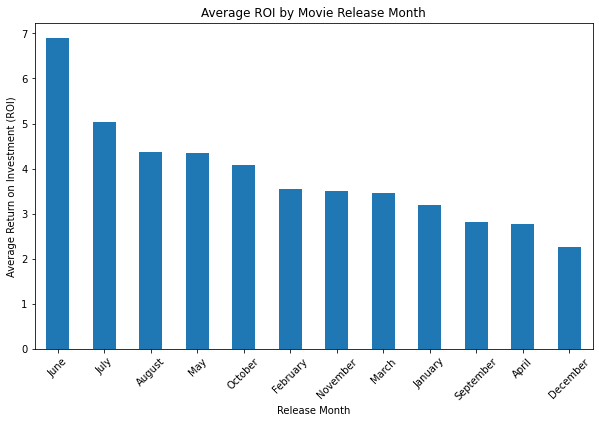

In [36]:
import matplotlib.pyplot as plt

monthly_roi.plot(kind='bar', figsize=(10,6))
plt.title('Average ROI by Movie Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Return on Investment (ROI)')
plt.xticks(rotation=45)
plt.show()


We will use linear regression to confirm.

In [37]:
import statsmodels.api as sm

# Drop missing values
reg_df = df_tn[['release_month', 'roi']].dropna()

X = reg_df['release_month']
y = reg_df['roi']

# Add constant for intercept
X = sm.add_constant(X)


In [38]:
#fitting the model
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3447
Date:                Sun, 14 Dec 2025   Prob (F-statistic):              0.557
Time:                        15:21:09   Log-Likelihood:                -27778.
No. Observations:                5782   AIC:                         5.556e+04
Df Residuals:                    5780   BIC:                         5.557e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2622      0.878      4.857      0.000       2.542       5.982
release_month    -0.0655      0.112     -0.587      0.557      -0.284       0.153
==============================================================================
Omnibus:                    17216.421   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1394209027.104
Skew:                          42.372   Prob(JB):                         0.00
Kurtosis:                    2407.146   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#getting coefficient and confidence interval
coef = model.params['release_month']
conf_int = model.conf_int().loc['release_month']

coef, conf_int



(-0.06553037853846312,
 0   -0.284323
 1    0.153262
 Name: release_month, dtype: float64)

H₀: Release month does not affect ROI

H₁: Release month affects ROI

Conclusion:
H₀ (Null Hypothesis):
Release month does not affect movie ROI.

H₁ (Alternative Hypothesis):
Release month affects movie ROI.

Interpretation Using Confidence Interval

The confidence interval includes 0

This means the true effect of release month on ROI could be negative, positive, or zero

Therefore, the estimated effect is not statistically significant

Because the 95% confidence interval includes zero, we fail to reject the null hypothesis.

There is no statistically significant linear relationship between release month and ROI.